In [1]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

In [ ]:
image = 'img_0000'
sim = 'sim1'

data_folder = ROOT / 'data'

image_folder = data_folder / 'processed' / image
ms_folder = image_folder / sim

ms_path = ms_folder / 'visibilities.ms'

data_update using version casarundata-2025.08.07-1.tar.gz, acquiring the lock ... 


lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
A previous attempt to update path may have failed or exited prematurely.
Remove the lock file and set force to True with the desired version (default to most recent).
It may be best to completely re-populate path using pull_data and measures_update.
2025-08-29 02:19:46	SEVERE	::casa	lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
2025-08-29 02:19:46	SEVERE	::casa	data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
2025-08-29 02:19:46	SEVERE	::casa	A previous attempt to update path may have failed or exited prematurely.
2025-08-29 02:19:46	SEVERE	::casa	Remove the lock file and set force to True with the desired version (default to most recent).
2025-08-29 02:19:46	SEVERE	::casa	It may be best to completely re-populate path using pull_data and measures_update.
2025-08-29 02:19:46	SEVERE

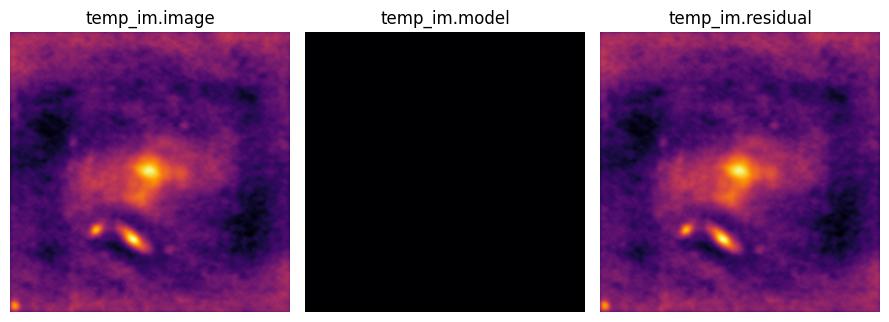

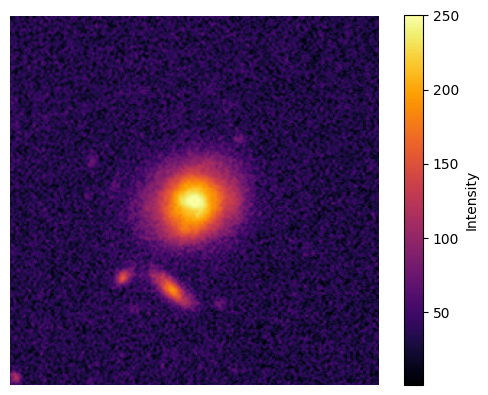

In [3]:
from src.imager.tclean import TCleanImager
from src.utils.plot import plot_image, plot_fits, plot_ms

imager = TCleanImager(vis = str(ms_path), output_folder=ms_folder)

image_path = image_folder / f'groundtruth.fits'
plot_ms(ms_path=str(ms_path))
plot_fits(fits_path=str(image_path))

Imaging completed.


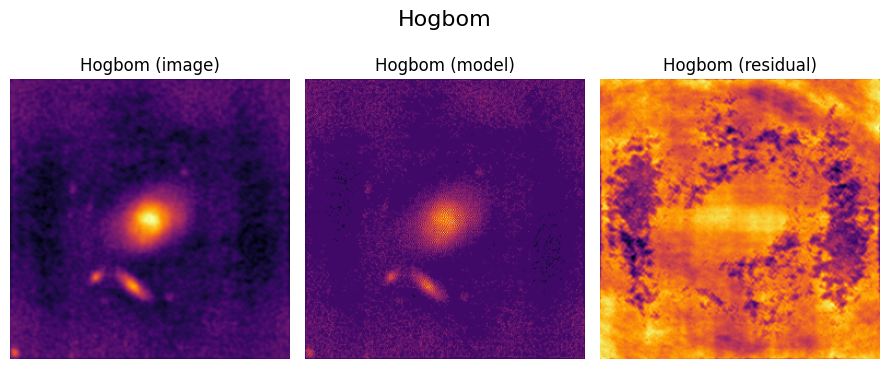

In [4]:
niter_hogbom = 50000
hogbom_config = {
        'imsize': 256,
        'cell': '0.02arcsec',
        'niter': niter_hogbom,
        'weighting': 'natural',
        'deconvolver': 'hogbom',
    }

imager.reconstruct(config=hogbom_config)

image_path = ms_folder / f'tclean_hogbom_{niter_hogbom}'
plot_image(image_path=str(image_path), title='Hogbom')

2025-08-29 02:19:55	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:19:58	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging


Imaging completed.


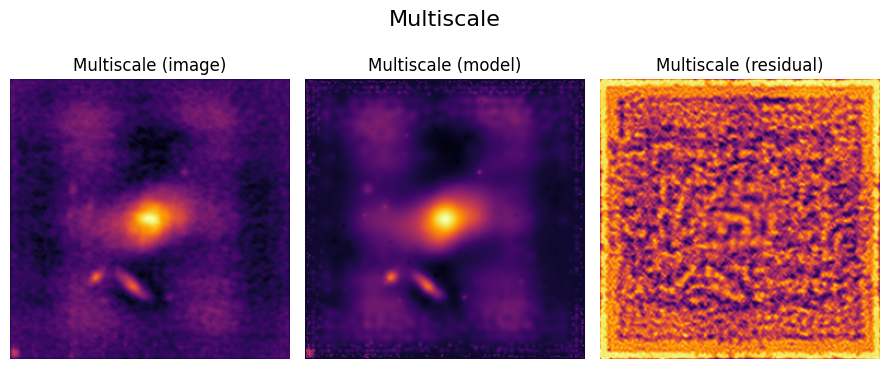

In [5]:
niter_multiscale = 10000
tclean_multiscale_config = {
    'imsize': 256,
    'cell': '0.02arcsec',
    'niter': niter_multiscale,
    'weighting': 'natural',
    'scales': [0, 4, 12, 32],
    'deconvolver': 'multiscale',
}
imager.reconstruct(config=tclean_multiscale_config)
image_path = ms_folder / f'tclean_multiscale_{niter_multiscale}'
plot_image(image_path=str(image_path), title='Multiscale')

Peak Res at start of step : 6.45794
Flux at start of step : 0
MAX RES at end : 3.69725
peakres : 3.69725    model : 556.913
Peak Res at start of step : 3.92444
Flux at start of step : 556.913
MAX RES at end : 1.76926
peakres : 1.94239    model : 1028.22
Peak Res at start of step : 2.13344
Flux at start of step : 1028.22
MAX RES at end : 0.779182
peakres : 1.37239    model : 1807.15
Peak Res at start of step : 1.18512
Flux at start of step : 1807.15
MAX RES at end : 0.604939
peakres : 0.74071    model : 2576.66
Peak Res at start of step : 0.901481
Flux at start of step : 2576.66
MAX RES at end : 0.242374
peakres : 0.69666    model : 2660.32
Peak Res at start of step : 0.870997
Flux at start of step : 2660.32
MAX RES at end : 0.214355
peakres : 0.675812    model : 2678
Peak Res at start of step : 0.865617
Flux at start of step : 2678
MAX RES at end : 0.212883
peakres : 0.670891    model : 2682.88
Peak Res at start of step : 0.864121
Flux at start of step : 2682.88
MAX RES at end : 0.2130

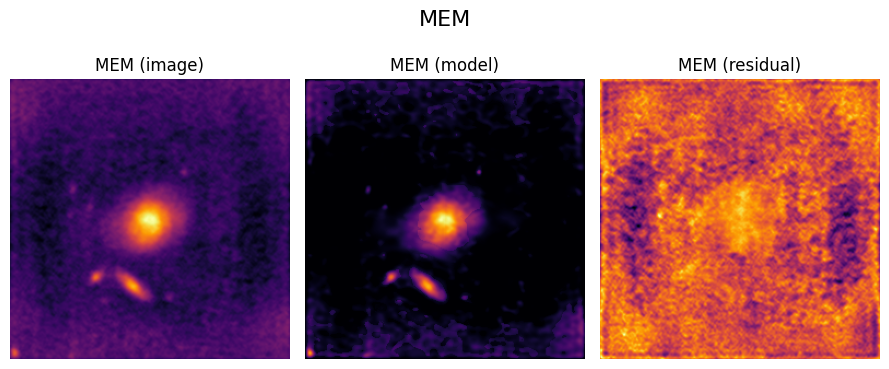

In [6]:
niter_mem = 200
tclean_mem_config = {
    'imsize': 256,
    'cell': '0.02arcsec',
    'niter': niter_mem,
    'weighting': 'natural',
    'deconvolver': 'mem',
}

imager.reconstruct(config=tclean_mem_config)

image_path = ms_folder / f'tclean_mem_{niter_mem}'
plot_image(image_path=str(image_path), title='MEM')

Hogbom: 


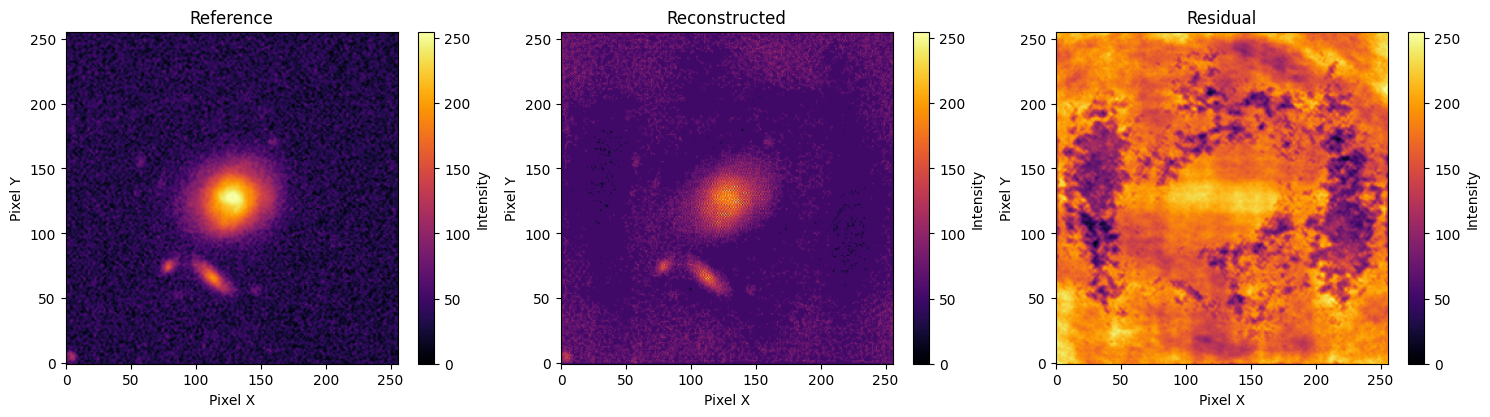

Multiscale: 


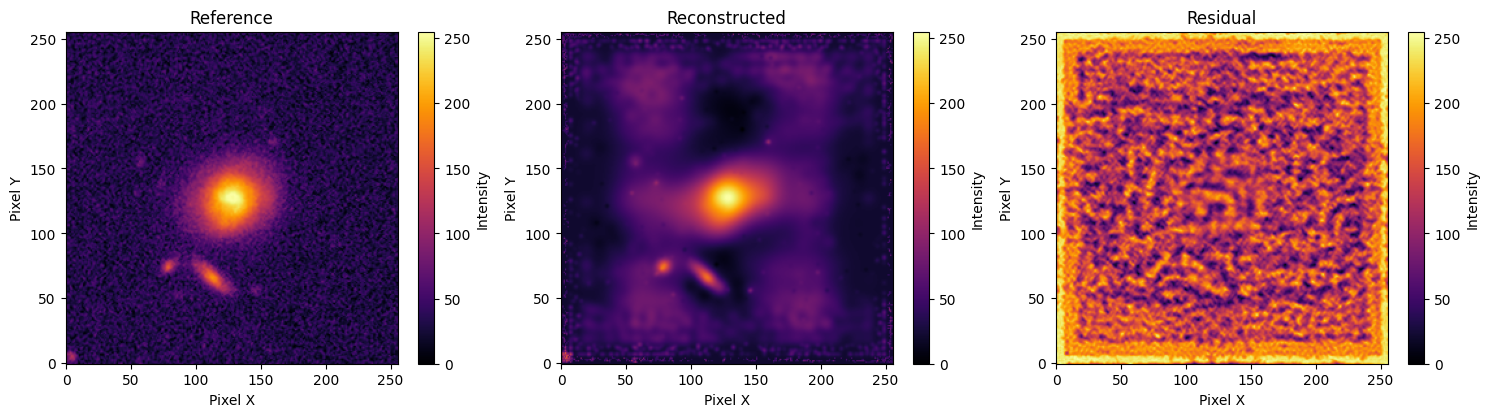

MEM: 


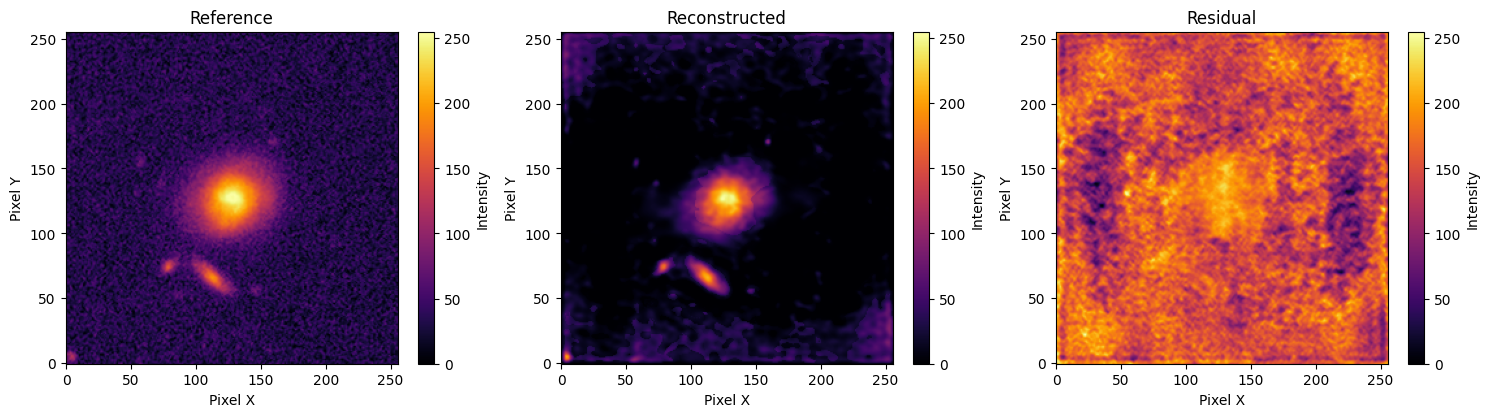

In [7]:
# Calculate image quality metrics of the dirty image
from src.preprocess.image_quality_metrics import ImageQualityMetrics

reference_path = data_folder/ 'processed' / image / 'groundtruth.fits'
type_image = 'model'

image_path = ms_folder / f'tclean_hogbom_{niter_hogbom}' / f'tclean_hogbom_{niter_hogbom}.{type_image}'
residual_path = ms_folder / f'tclean_hogbom_{niter_hogbom}' / f'tclean_hogbom_{niter_hogbom}.residual'
iqm = ImageQualityMetrics(
    image_path=str(image_path), 
    residual_path=str(residual_path), 
    reference_path=str(reference_path)
)

multiscale_image_path = ms_folder / f'tclean_multiscale_{niter_multiscale}' / f'tclean_multiscale_{niter_multiscale}.{type_image}'
multiscale_residual_path = ms_folder / f'tclean_multiscale_{niter_multiscale}' / f'tclean_multiscale_{niter_multiscale}.residual'
iqm_multiscale = ImageQualityMetrics(
    image_path=str(multiscale_image_path), 
    residual_path=str(multiscale_residual_path), 
    reference_path=str(reference_path)
)

mem_image_path = ms_folder / f'tclean_mem_{niter_mem}' / f'tclean_mem_{niter_mem}.{type_image}'
mem_residual_path = ms_folder / f'tclean_mem_{niter_mem}' / f'tclean_mem_{niter_mem}.residual'
iqm_mem = ImageQualityMetrics(
    image_path=str(mem_image_path), 
    residual_path=str(mem_residual_path), 
    reference_path=str(reference_path)
)

print("Hogbom: ")
iqm.plot_images()

print("Multiscale: ")
iqm_multiscale.plot_images()

print("MEM: ")
iqm_mem.plot_images()

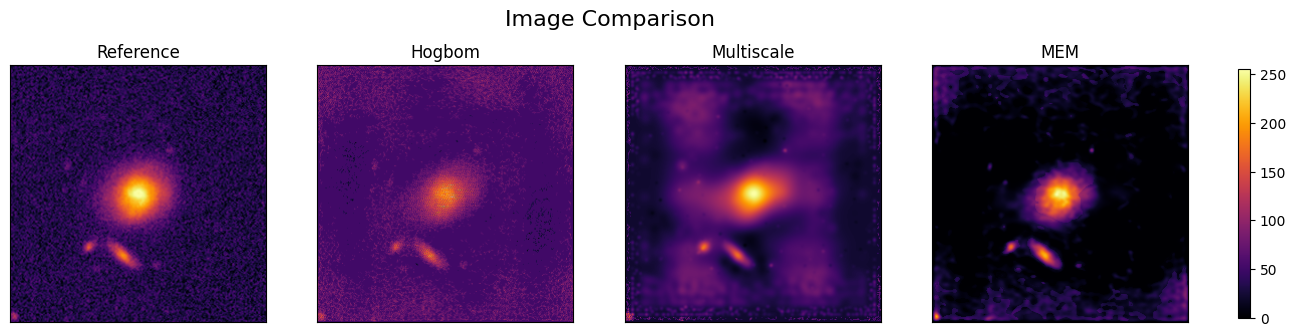

In [8]:
data_reference = iqm.data_reference
data_hogbom = iqm.data_image
data_multiscale = iqm_multiscale.data_image
data_mem = iqm_mem.data_image

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16,16))
cmap = 'inferno'

vmin = min(np.min(data_reference), np.min(data_hogbom), np.min(data_multiscale), np.min(data_mem))
vmax = max(np.max(data_reference), np.max(data_hogbom), np.max(data_multiscale), np.max(data_mem))

im0 = axs[0].imshow(data_reference, cmap=cmap, vmin=vmin, vmax=vmax)
axs[0].set_title('Reference')
im1 = axs[1].imshow(data_hogbom, cmap=cmap, vmin=vmin, vmax=vmax)
axs[1].set_title('Hogbom')
im2 = axs[2].imshow(data_multiscale, cmap=cmap, vmin=vmin, vmax=vmax)
axs[2].set_title('Multiscale')
im3 = axs[3].imshow(data_mem, cmap=cmap, vmin=vmin, vmax=vmax)
axs[3].set_title('MEM')

for ax in axs.flat:
    ax.invert_yaxis()
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('Image Comparison', fontsize=16, y=0.61)
fig.colorbar(im0, ax=axs, orientation='vertical', fraction=0.01, pad=0.04)
plt.show()
